```
Student-1
Name:Rasel Mahmud
ID:20-43867-2
```

```
Student-2
Name:Mohammad Shafin
ID:20-43736-2
```



*   Mount your google drive.



In [3]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'



*   Import necessary libraries.



In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split,KFold, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler

•	**Task 1:** Read/Load the dataset file in your program. Use Pandas library to complete this task.

In [5]:
file_path = '/content/drive/MyDrive/Python Final Project NEW/loan_train.csv'
data = pd.read_csv("loan_train.csv")
print(data.head())
print("\nNumber of Entries in the Dataset:", len(data))

  Gender Married Dependents     Education Self_Employed  Applicant_Income  \
0   Male      No          0      Graduate            No            584900   
1   Male     Yes          1      Graduate            No            458300   
2   Male     Yes          0      Graduate           Yes            300000   
3   Male     Yes          0  Not Graduate            No            258300   
4   Male      No          0      Graduate            No            600000   

   Coapplicant_Income  Loan_Amount   Term  Credit_History   Area Status  
0                 0.0     15000000  360.0             1.0  Urban      Y  
1            150800.0     12800000  360.0             1.0  Rural      N  
2                 0.0      6600000  360.0             1.0  Urban      Y  
3            235800.0     12000000  360.0             1.0  Urban      Y  
4                 0.0     14100000  360.0             1.0  Urban      Y  

Number of Entries in the Dataset: 614


•	**Task 2:** Apply appropriate data cleaning techniques to the dataset. In this step, replace bad data using proper methods and do not delete any record except duplicate records. Use Pandas library to complete this task.

In [6]:
data.info()
data.isnull().sum()

missing_values = data.isnull().sum()
print("Columns with Missing Values:")
print(missing_values[missing_values > 0])
total_missing = missing_values.sum()
print("\nTotal Missing Values in the Dataset:", total_missing)
columns_with_missing = missing_values[missing_values > 0]
print("Columns with Missing Values:")
print(columns_with_missing.index.tolist())


for column in data.columns:
    if data[column].dtype == 'object' or column in ['Credit_History', 'Term']:
        data[column].fillna(data[column].mode()[0], inplace=True)
    elif data[column].dtype != 'object' and column not in ['Credit_History', 'Term']:
        data[column].fillna(data[column].mean(), inplace=True)

updated_file_path = '/content/drive/MyDrive/Python Final Project NEW/loan_train_updated1.csv'
data.to_csv(updated_file_path, index=False)
try:
    pd.read_csv(updated_file_path)
    print("File saved successfully!")
except Exception as e:
    print(f"Error occurred: {str(e)}")


updated_data1 = pd.read_csv(updated_file_path)
print("Column names in the dataset:")
print(updated_data1.columns.tolist())


updated_data1['Dependents'] = updated_data1['Dependents'].str.replace('+', '')
updated_data1['Dependents'] = updated_data1['Dependents'].astype('int64')

updated_file_path1 = '/content/drive/MyDrive/Python Final Project NEW/loan_train_updated_without_plus.csv'
updated_data1.to_csv(updated_file_path1, index=False)
try:
    pd.read_csv(updated_file_path1)
    print("File saved successfully!")
except Exception as e:
    print(f"Error occurred: {str(e)}")


updated_data2 = pd.read_csv(updated_file_path1)
categorical_columns = data.select_dtypes(include=['object']).columns
for column in categorical_columns:
    unique_values = updated_data2[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)
    print()


duplicate_rows = updated_data2[updated_data1.duplicated()]
if duplicate_rows.empty:
    print("No duplicate rows found.")
else:
    print("Duplicate rows:")
    print(duplicate_rows)



updated_data2['Gender'] = updated_data2['Gender'].replace({'Male': 0, 'Female': 1})
updated_data2['Married'] = updated_data2['Married'].replace({'No': 0, 'Yes': 1})
updated_data2['Education'] = updated_data2['Education'].replace({'Not Graduate': 0, 'Graduate': 1})
updated_data2['Self_Employed'] = updated_data2['Self_Employed'].replace({'No': 0, 'Yes': 1})
updated_data2['Area'] = updated_data2['Area'].replace({'Urban': 0, 'Rural': 1, 'Semiurban': 2})




updated_data2['Gender'] = updated_data2['Gender'].astype('int64')
updated_data2['Married'] = updated_data2['Married'].astype('int64')
updated_data2['Education'] = updated_data2['Education'].astype('int64')
updated_data2['Self_Employed'] = updated_data2['Self_Employed'].astype('int64')
updated_data2['Area'] = updated_data2['Area'].astype('int64')


columns_to_plot = ['Applicant_Income', 'Coapplicant_Income', 'Loan_Amount', 'Term']
target_column = 'Status'
fig, axs = plt.subplots(1, len(columns_to_plot), figsize=(15, 4))
for i, column in enumerate(columns_to_plot):
    axs[i].scatter(updated_data2[column], updated_data2[target_column], c=updated_data2[target_column].map({'Y': 'blue', 'N': 'red'}))
    axs[i].set_xlabel(column)
    axs[i].set_ylabel(target_column)
    axs[i].set_title(f'{column} vs {target_column}')

plt.tight_layout()
plt.show()



columns_to_replace_outliers = [
    'Applicant_Income', 'Coapplicant_Income', 'Loan_Amount']
for column in columns_to_replace_outliers:
    Q1 = updated_data2[column].quantile(0.25)
    Q3 = updated_data2[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    median_val = updated_data2[column].median()
    updated_data2[column] = updated_data2[column].apply(lambda x: median_val if x < lower_bound or x > upper_bound else x)
output_path = '/content/drive/MyDrive/Python Final Project NEW/after_removed_outliers_in_dataset.csv'
updated_data2.to_csv(output_path, index=False)
try:
    pd.read_csv(output_path)
    print("File saved successfully!")
except Exception as e:
    print(f"Error occurred: {str(e)}")

updated_data3 = pd.read_csv(output_path)


columns_to_plot = ['Applicant_Income', 'Coapplicant_Income', 'Loan_Amount', 'Term']
target_column = 'Status'
fig, axs = plt.subplots(1, len(columns_to_plot), figsize=(15, 4))

for i, column in enumerate(columns_to_plot):
    axs[i].scatter(updated_data3[column], updated_data3[target_column], c=updated_data3[target_column].map({'Y': 'blue', 'N': 'red'}))
    axs[i].set_xlabel(column)
    axs[i].set_ylabel(target_column)
    axs[i].set_title(f'{column} vs {target_column}')

plt.tight_layout()
plt.show()





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              601 non-null    object 
 1   Married             611 non-null    object 
 2   Dependents          599 non-null    object 
 3   Education           614 non-null    object 
 4   Self_Employed       582 non-null    object 
 5   Applicant_Income    614 non-null    int64  
 6   Coapplicant_Income  614 non-null    float64
 7   Loan_Amount         614 non-null    int64  
 8   Term                600 non-null    float64
 9   Credit_History      564 non-null    float64
 10  Area                614 non-null    object 
 11  Status              614 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 57.7+ KB
Columns with Missing Values:
Gender            13
Married            3
Dependents        15
Self_Employed     32
Term              14
Credit_Histo

OSError: Cannot save file into a non-existent directory: '\content\drive\MyDrive\Python Final Project NEW'

•	**Task 3:** Draw graphs to analyze the frequency distributions of the features. Use Matplotlib library to complete this task. Draw all the plots in a single figure so that all plots can be seen in one diagram (use subplot() function).

In [7]:

numerical_columns = updated_data3.select_dtypes(include='float64').columns
object_columns = updated_data1.select_dtypes(include='object').columns

num_plots = len(numerical_columns) + len(object_columns)
cols = 3
rows = 4
fig, axs = plt.subplots(rows, cols, figsize=(14, 15))

axs = axs.flatten() if rows > 1 else [axs]

for i, column in enumerate(numerical_columns):
    ax = axs[i]
    updated_data3[column].plot(kind='hist', ax=ax, title=column)

for i, column in enumerate(object_columns, start=len(numerical_columns)):
    ax = axs[i]
    value_counts = updated_data1[column].value_counts()
    value_counts.plot(kind='bar', ax=ax, title=column)

for i in range(num_plots, len(axs)):
    axs[i].axis('off')

plt.tight_layout()
plt.show()


NameError: name 'updated_data3' is not defined

•	**Task 4:** Draw graphs to illustrate if there is any relationship between target column to any other columns of the dataset. Use Matplotlib library to complete this task. Also use sublot() function to show all plots in one figure.

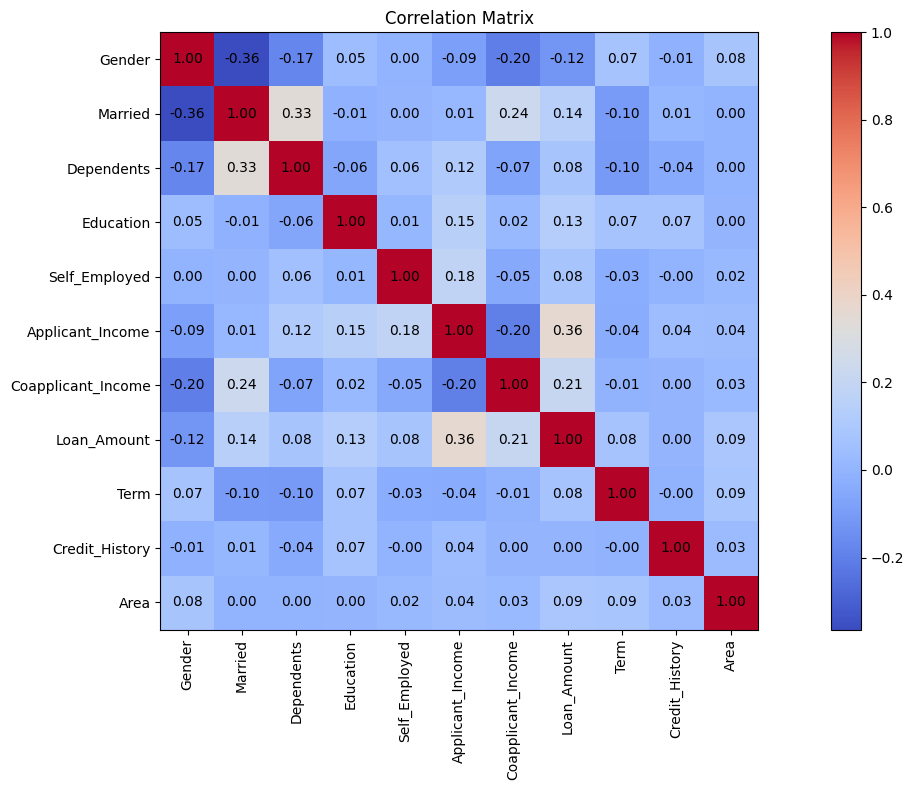

In [6]:
numeric_data = updated_data3.select_dtypes(include=np.number)
corr_matrix = numeric_data.corr()

plt.figure(figsize=(15, 8))
heatmap = plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar(heatmap)
plt.title('Correlation Matrix')

plt.xticks(np.arange(len(corr_matrix)), corr_matrix.columns, rotation=90)
plt.yticks(np.arange(len(corr_matrix)), corr_matrix.index)

for i in range(len(corr_matrix)):
    for j in range(len(corr_matrix)):
        plt.text(j, i, f'{corr_matrix.iloc[i, j]:.2f}', ha='center', va='center', color='black')

plt.tight_layout()
plt.show()

•	**Task 5:** Perform scaling to the features of the dataset. Remember that you will need to apply data conversion before performing scaling if it is needed.

In [7]:
columns_to_scale = ['Applicant_Income', 'Coapplicant_Income', 'Loan_Amount', 'Term']
scaler = MinMaxScaler()
updated_data3[columns_to_scale] = scaler.fit_transform(updated_data3[columns_to_scale])
output_path = '/content/drive/MyDrive/Python Final Project NEW/after_scaling_in_dataset.csv'
updated_data3.to_csv(output_path, index=False)
updated_data4 = pd.read_csv(output_path)

•	**Task 6:** Split your data into two parts: Training dataset and Testing dataset. You must use the function train_test_split() to complete this task and use value 123 as the value of the random_state parameter of this function.

In [8]:
X = updated_data4.iloc[:, :11]
y = updated_data4.iloc[:, 11]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (491, 11)
Shape of X_test: (123, 11)
Shape of y_train: (491,)
Shape of y_test: (123,)


•	**Task 7:** Apply Naïve Bayes Classifier to the dataset. Build (train) your prediction model in this step.

In [9]:
nb = GaussianNB()
nb.fit(X_train, y_train)
print("Naive Bayes score: ",nb.score(X_test, y_test))
y_pred = nb.predict(X_test)
prediction_score = metrics.accuracy_score(y_test, y_pred)
print("Prediction Score (Accuracy): ", prediction_score)

Naive Bayes score:  0.7804878048780488
Prediction Score (Accuracy):  0.7804878048780488


•	**Taks 8:** Calculate the confusion matrix for your model. Interpret it in detail in the report.

Confusion Matrix:
[[17 25]
 [ 2 79]]


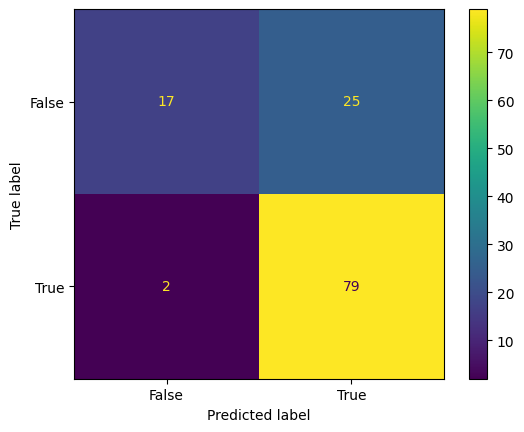

In [10]:
cm =metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_display.plot()
plt.show()

•	**Task 9:** Calculate the accuracy, precision, recall and f-1 score of your model.

In [11]:
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, pos_label='Y')
recall = metrics.recall_score(y_test, y_pred, pos_label='Y')
f1 = metrics.f1_score(y_test, y_pred, pos_label='Y')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")


Accuracy: 0.7805
Precision: 0.7596
Recall: 0.9753
F1-score: 0.8541


•	**Task 10:** Show how 10-fold cross validation can be used to build a naïve bayes classifier and report the accuracy of this model.

In [12]:
k_folds = KFold(n_splits = 10)

scores = cross_val_score(nb, X, y, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.77419355 0.80645161 0.75806452 0.77419355 0.78688525 0.80327869
 0.86885246 0.85245902 0.80327869 0.83606557]
Average CV Score:  0.8063722897937599
Number of CV Scores used in Average:  10
